<a href="https://colab.research.google.com/github/Rahul0301/TSF-GRIP-TASKS/blob/main/Task3/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#@TSF GRIP TASKS
#Data Science And Business Analytics
#Author - V Rahul
#Task 3. Exploratory Data Analysis
#Task 3:
- Perform Exploratory Data Analysis (EDA) on the 'SampleSuperstore' dataset.
- As a business manager, try to find out the weak areas where you can work to make more profit.

##Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcdefaults()
plt.rcParams.update({'axes.facecolor':'white'})

import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [2]:
# dataset url --> https://bit.ly/3i4rbWl
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df= pd.read_csv('/content/drive/MyDrive/ML_LAB/SampleSuperstore.csv')
df.head() ## returns first few rows of the dataset.

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Exploring the Dataset

In [4]:
df.shape

(9994, 13)

In [5]:
## Returns descriptive statistics of the data.
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
df.drop(['Country'], axis=1, inplace= True)
df.drop(['Postal Code'], axis=1, inplace= True)

In [9]:
df.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

#EDA-Retail

In [10]:
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


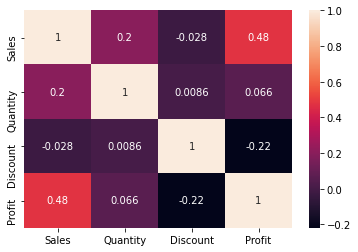

In [11]:
sns.heatmap(df.corr(), annot= True)

- A value of 0.48 indicates that there is a positive correlation between Profit and Sales.
- A value of -0.22 indicates that there is a negative correlation between Profit and Discount.

#Analyzing the relationship between Sales, Profit and Discount.

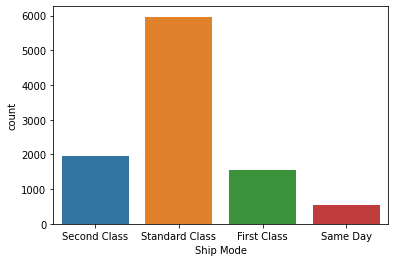

In [12]:
sns.countplot(df['Ship Mode'])

Standard class is the most preferred ship mode.

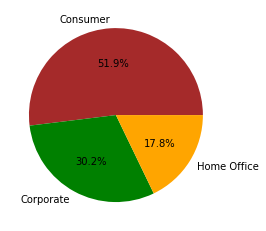

In [13]:
color=['brown','green','orange']
plt.pie(df['Segment'].value_counts(), data=df, labels=df['Segment'].value_counts().index,autopct='%1.1f%%',
       colors=color )
plt.show()


Consumer contributes to maximum sales.

In [14]:
## Groups the 'State' by sum of Sales and Profit.
x=df.groupby('State')['Sales','Profit'].sum()
x.head()

,Sales,Profit
State,,
Alabama,19510.6400,5786.8253
Arizona,35282.0010,-3427.9246
Arkansas,11678.1300,4008.6871
California,457687.6315,76381.3871
Colorado,32108.1180,-6527.8579


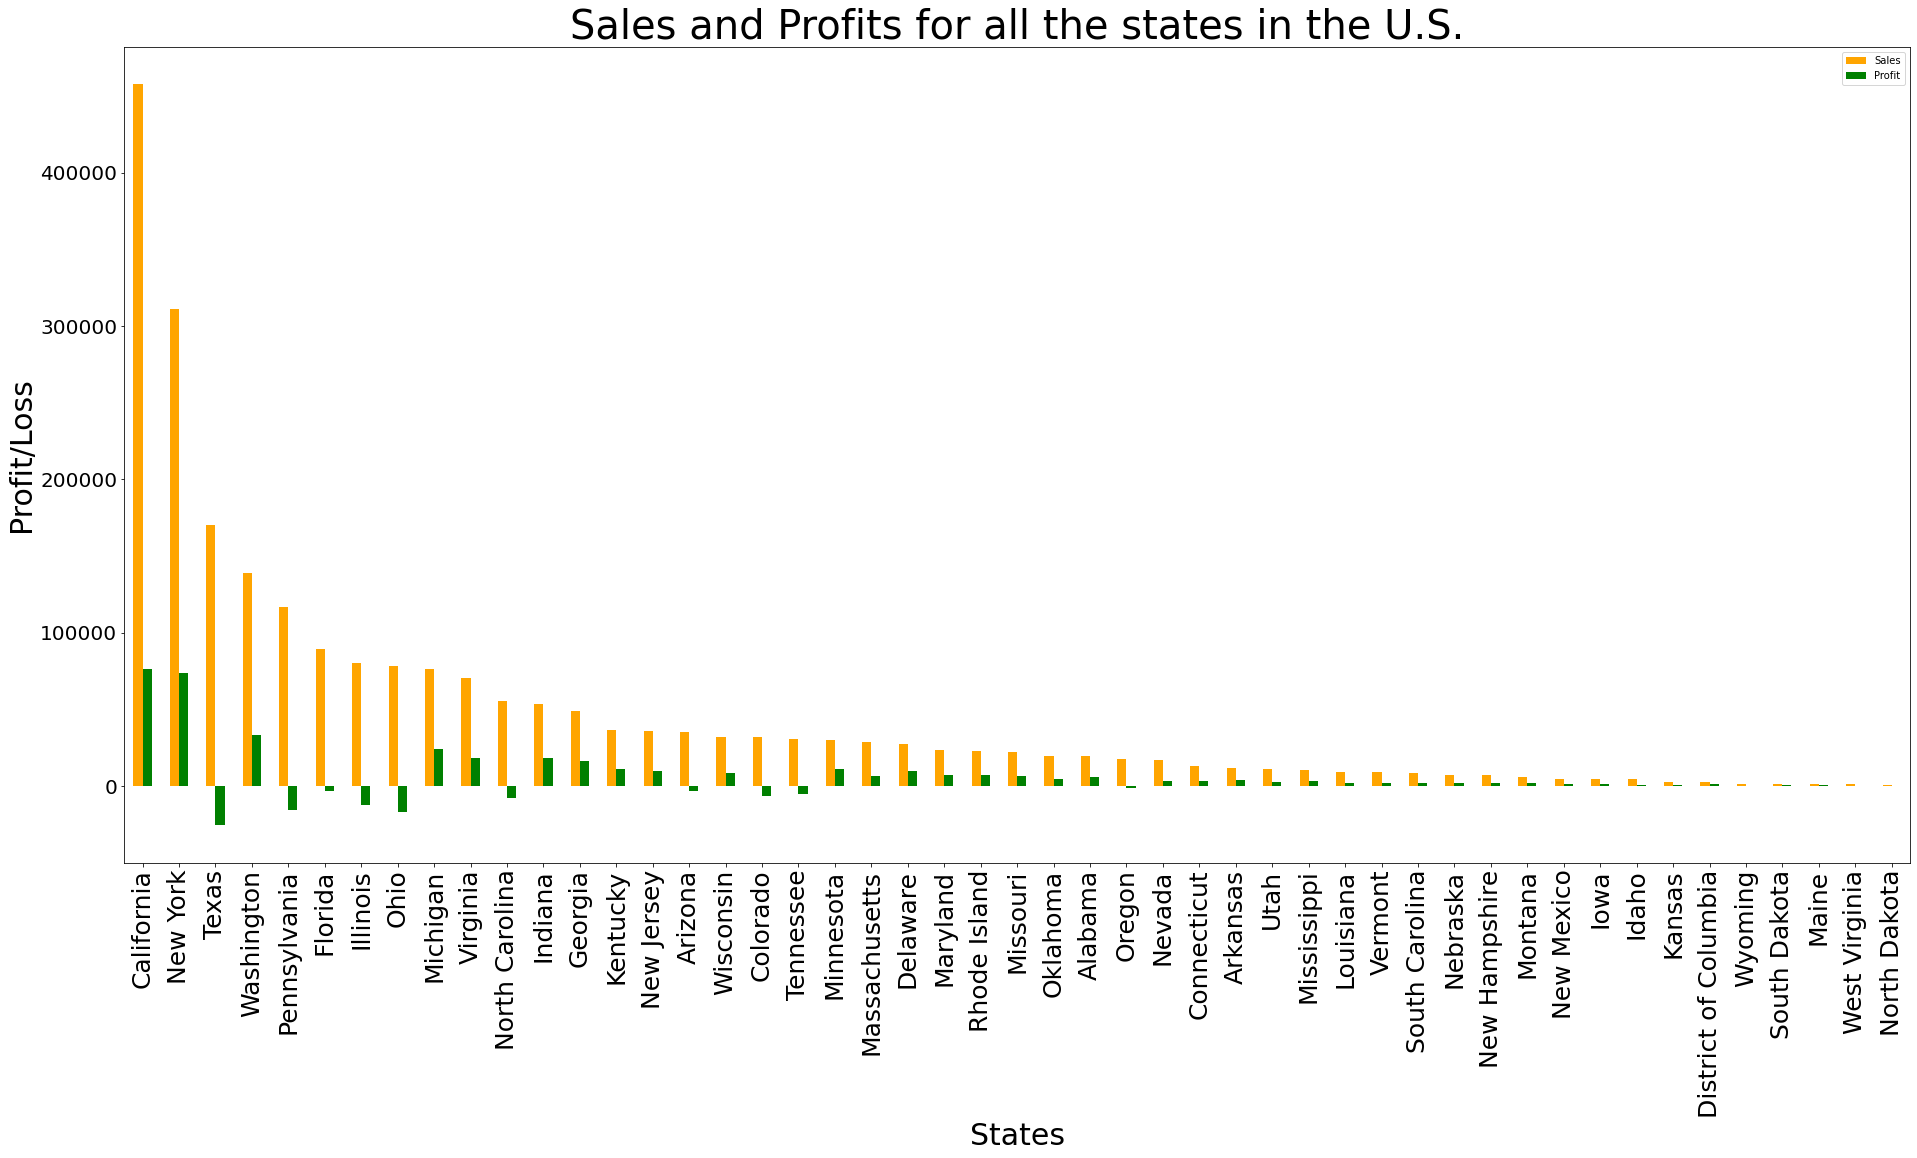

In [15]:
sales=df.groupby('State')['Sales','Profit'].sum().sort_values(by='Sales', ascending=False)
sales.plot.bar(color=['orange','green'],figsize=(32,15))
plt.xlabel('States',size=30)
plt.ylabel('Profit/Loss',size=30)
plt.xticks(size=25)
plt.yticks(size=20)
plt.title('Sales and Profits for all the states in the U.S.',size=40)
plt.show()

- Maximum sales and profits happen to be in California and New York.
- West Virginia and North Dakota have minimum sales.
- Maximum losses are from Taxes.

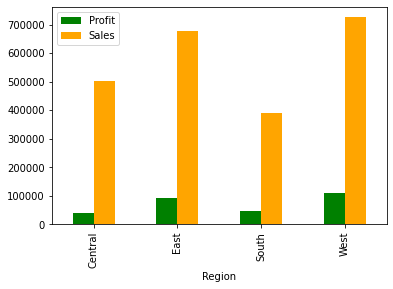

In [16]:
reg=df.groupby('Region')['Profit','Sales'].sum()
reg.plot.bar(color=['green','orange'])

- Central region makes minimum profit.
- The West makes maximum sales and profit.

Text(0.5, 0, 'Discount')

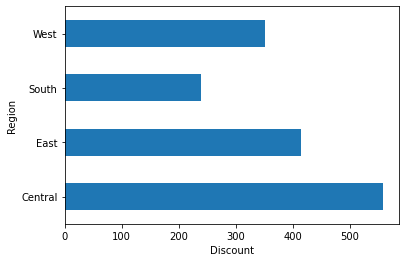

In [17]:
a=df.groupby('Region')['Discount'].sum()
a.plot.barh()
plt.xlabel('Discount')

- Central region gives maximum discount.
- South gives the least.

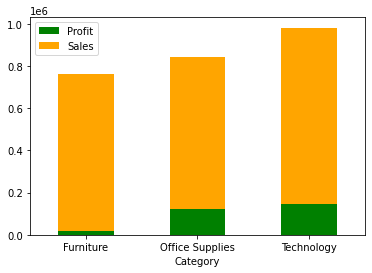

In [18]:
a=df.groupby('Category')['Profit','Sales'].sum()
a.plot.bar(stacked=True, rot=0, color=['green','orange'])

- Technology contributes to maximum sales and profits while furniture makes the least profit.

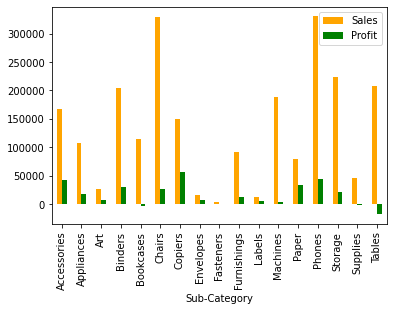

In [19]:
a=df.groupby('Sub-Category')['Sales','Profit'].sum()
a.plot.bar(color = ['orange', 'green'])

- Chairs and Phones contribute to maximum sales.
- Tables and Bookcases contribute to maximum losses.

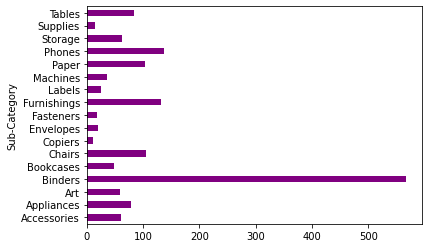

In [20]:
a=df.groupby('Sub-Category')['Discount'].sum()
a.plot.barh(color=['purple'])

- Maximum Discounts are given on Binders and minimum on Copiers.

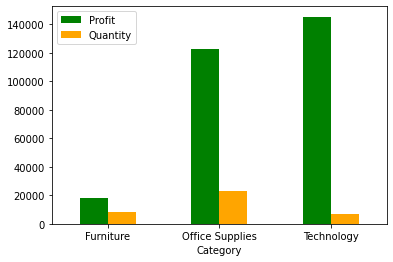

In [21]:
a=df.groupby('Category')['Profit','Quantity'].sum()
a.plot.bar(color=['green','orange'],rot=0)

- Technology makes maximum profit,with minimum quantities being sold.
- Furniture makes least profit.

# Conclusion
- Sales need to be improved in states like North Dakota, West Virginia, Maine.
- Texas, Pennsylvania, Ohio suffer from losses. Adequate measures need to be adopted to make their sales profitable.
- Since the Central region makes minimum profit and offers maximum discount, their sales can be made more profitable by reducing the discounts.
- Furniture makes minimum profit, but has relatively high sales. The sales should be reduced to not incur loss in the future.
- Tables and bookcases cause maximum losses. Improvements need to be made in order to gain profit from their sales by either reducing the discount, or other means.
- The least quantity of items sold are copiers among all the other sub categories. However, they contribute towards highest amount of profit. Changes should be done to increase their sales.

#Thank You